In [1]:
%run ../common-imports.ipynb

# FLORENCE  NIGHTINGALE



<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Florence_Nightingale._Coloured_lithograph._Wellcome_V0006579.jpg" width="50%" align="left" style="padding-right:40px"/>

Florence Nightingale, the lady with the lamp, was not only a per-
son of extraordinary compassion and commitment, a polyglot and
polymath, but also what we would today call a data-scientist of the
highest order, and a pioneer in data-visualization. She was an avid
and meticulous gatherer and explorer of data. In the Crimean war
that started in 1853 where she was administering to the nursing
of British soldiers, she observed that far more soldiers died from
malnutrition, and the primitive and unsanitary nursing conditions
in the hospitals than from the actual battles. She conveyed this
persuasively through a series of revolutionary visualizations, like
the pair of roses; these more than merely depicted the astonishing
aspects of war mortality – they were also prescriptive of the reforms
that must follow to ameliorate the situation.
Needless to say, her insights led to perhaps the one of the greatest
reform in medical science, and the birth of modern, sanitary nursing
practices.

Let us begin, therefore, our journey into data-science with an
exploration of the Nightingale dataset. 

**GOALS**

* Become familiar with Nightingale's mortality data from the Crimean war, 
which had such a profound impact.
* Learn to create complex visualizations.

The contemporary view in data visualization is this *two roses* visualization
is perhaps not the simplest way to show this data; for example, the bar chart
conveys the proportions more easily.



<break/>



In [2]:
data = pd.read_csv("../../datasets/Nightingale.csv")

#### Descriptive statistics


In [3]:
data.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,24.0,NaN,NaN,NaN,12.5,7.071068,1.0,6.75,12.5,18.25,24.0
Date,24,24,1854-04-01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,24,12,Apr,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,24.0,NaN,NaN,NaN,1854.75,0.675664,1854.0,1854.0,1855.0,1855.0,1856.0
Army,24.0,NaN,NaN,NaN,34976.291667,9078.255562,8571.0,30211.25,32586.0,43284.0,47751.0
Disease,24.0,NaN,NaN,NaN,603.166667,716.798296,1.0,78.75,429.5,808.5,2761.0
Wounds,24.0,NaN,NaN,NaN,73.25,86.951886,0.0,0.75,45.0,118.5,287.0
Other,24.0,NaN,NaN,NaN,72.833333,93.839672,5.0,22.25,32.5,79.0,361.0
Disease.rate,24.0,NaN,NaN,NaN,221.508333,273.136193,1.4,21.825,139.95,316.275,1022.8
Wounds.rate,24.0,NaN,NaN,NaN,24.220833,29.045376,0.0,0.3,14.95,38.7,115.8


Let us drop some columns we will ignore for this analysis.

In [4]:
data.drop(columns=['Unnamed: 0', 'Disease.rate', 'Wounds.rate', 'Other.rate'], inplace=True)

This is a small dataset; let us pore over it in its entirety.

In [5]:
data

,Date,Month,Year,Army,Disease,Wounds,Other
0,1854-04-01,Apr,1854,8571,1,0,5
1,1854-05-01,May,1854,23333,12,0,9
2,1854-06-01,Jun,1854,28333,11,0,6
3,1854-07-01,Jul,1854,28722,359,0,23
4,1854-08-01,Aug,1854,30246,828,1,30
5,1854-09-01,Sep,1854,30290,788,81,70
6,1854-10-01,Oct,1854,30643,503,132,128
7,1854-11-01,Nov,1854,29736,844,287,106
8,1854-12-01,Dec,1854,32779,1725,114,131
9,1855-01-01,Jan,1855,32393,2761,83,324


#### Missing Values Analysis


In [6]:
data.isnull().sum()

Date       0
Month      0
Year       0
Army       0
Disease    0
Wounds     0
Other      0
dtype: int64

 From the above results, it appears that there are no missing values at all. Therefore, we don't need to worry about addressing this issue.

#### Pandas Profiling

In [7]:
# Caution, this requires the library, and needs TeX to be disabled. Run it by uncommenting.
# data.profile_report()


## Data Visualization

Let us see how causes of mortality for each year compare to each other. For this we start with a simple bar-chart.

<Figure size 2880x1440 with 0 Axes>

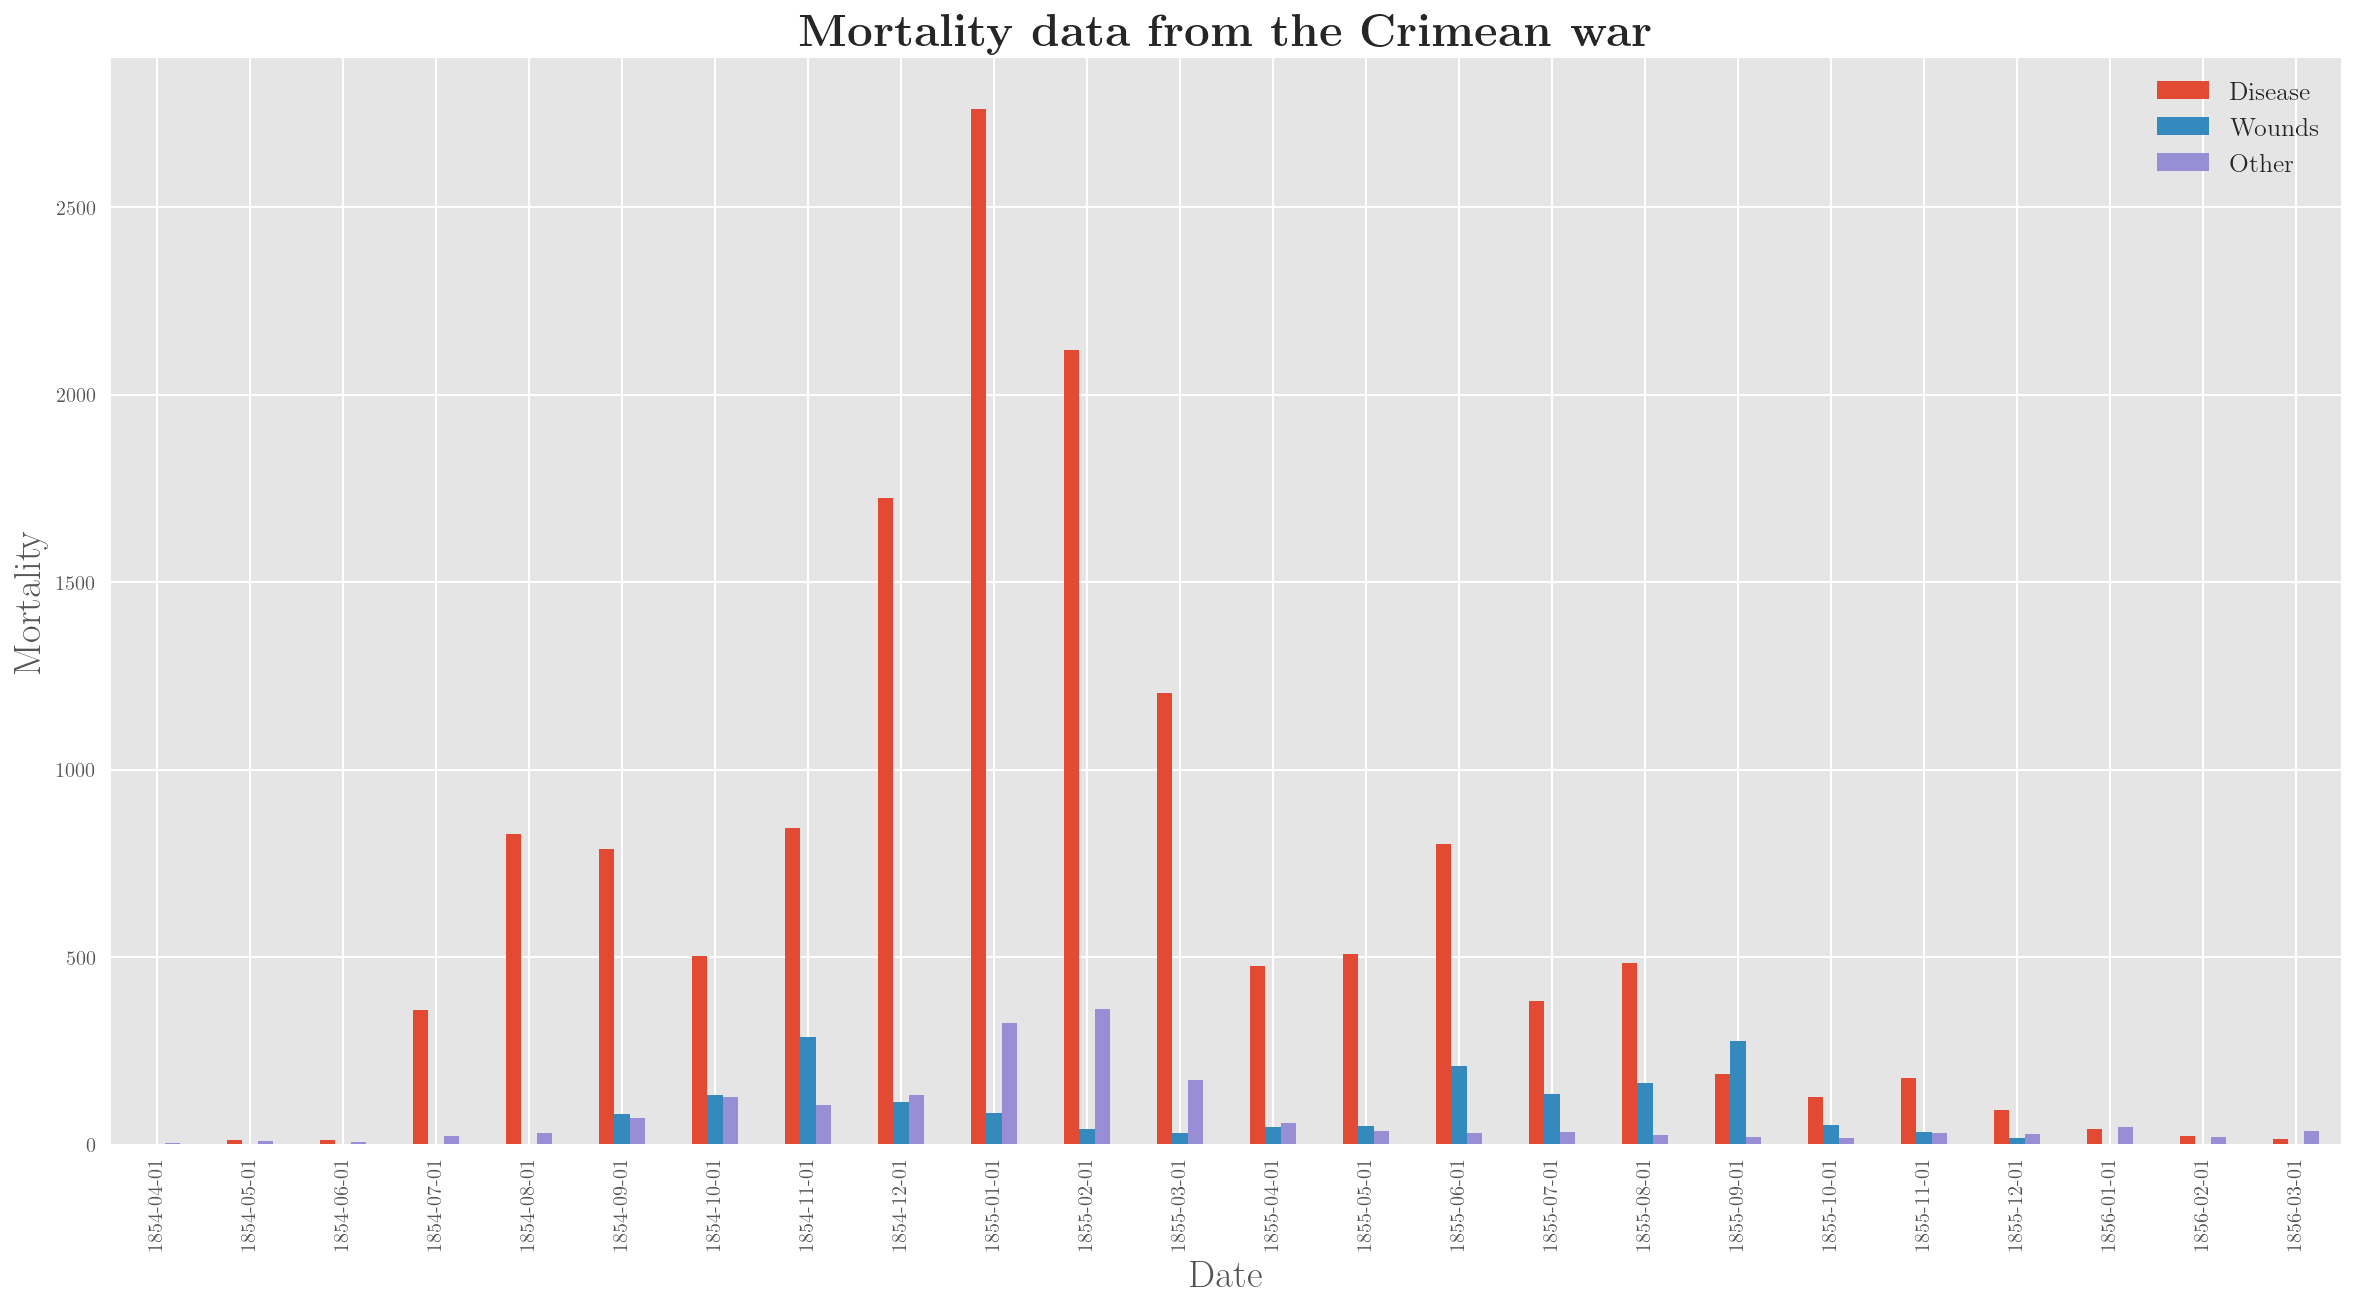

In [8]:
plt.figure(figsize=(20,10));
data.plot.bar(x = 'Date', y=['Disease', 'Wounds', 'Other']);
plt.title(r'\textbf{Mortality data from the Crimean war}');
plt.ylabel(r'Mortality');

Clearly, far fewer people died of war wounds compared to disease arising from the unsanitary conditions of the camps during the Cremian war. This strongly moved Florence Nightingale ("the angel of mercy"), who would later on found the practice of modern nursing.

## Rose diagram



Let us try to recreate a simplified version the celebrated *Two Roses Diagram* of Nightingale, "Diagram of the causes of mortality in the army in the east". 

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/17/Nightingale-mortality.jpg/1200px-Nightingale-mortality.jpg" />

We will plot out each of the two diagrams depicted above separately. 

In [9]:
one_year = data[data.Date < '1855-04-01']
second_year = data[data.Date >= '1855-04-01']

<Figure size 2880x1440 with 0 Axes>

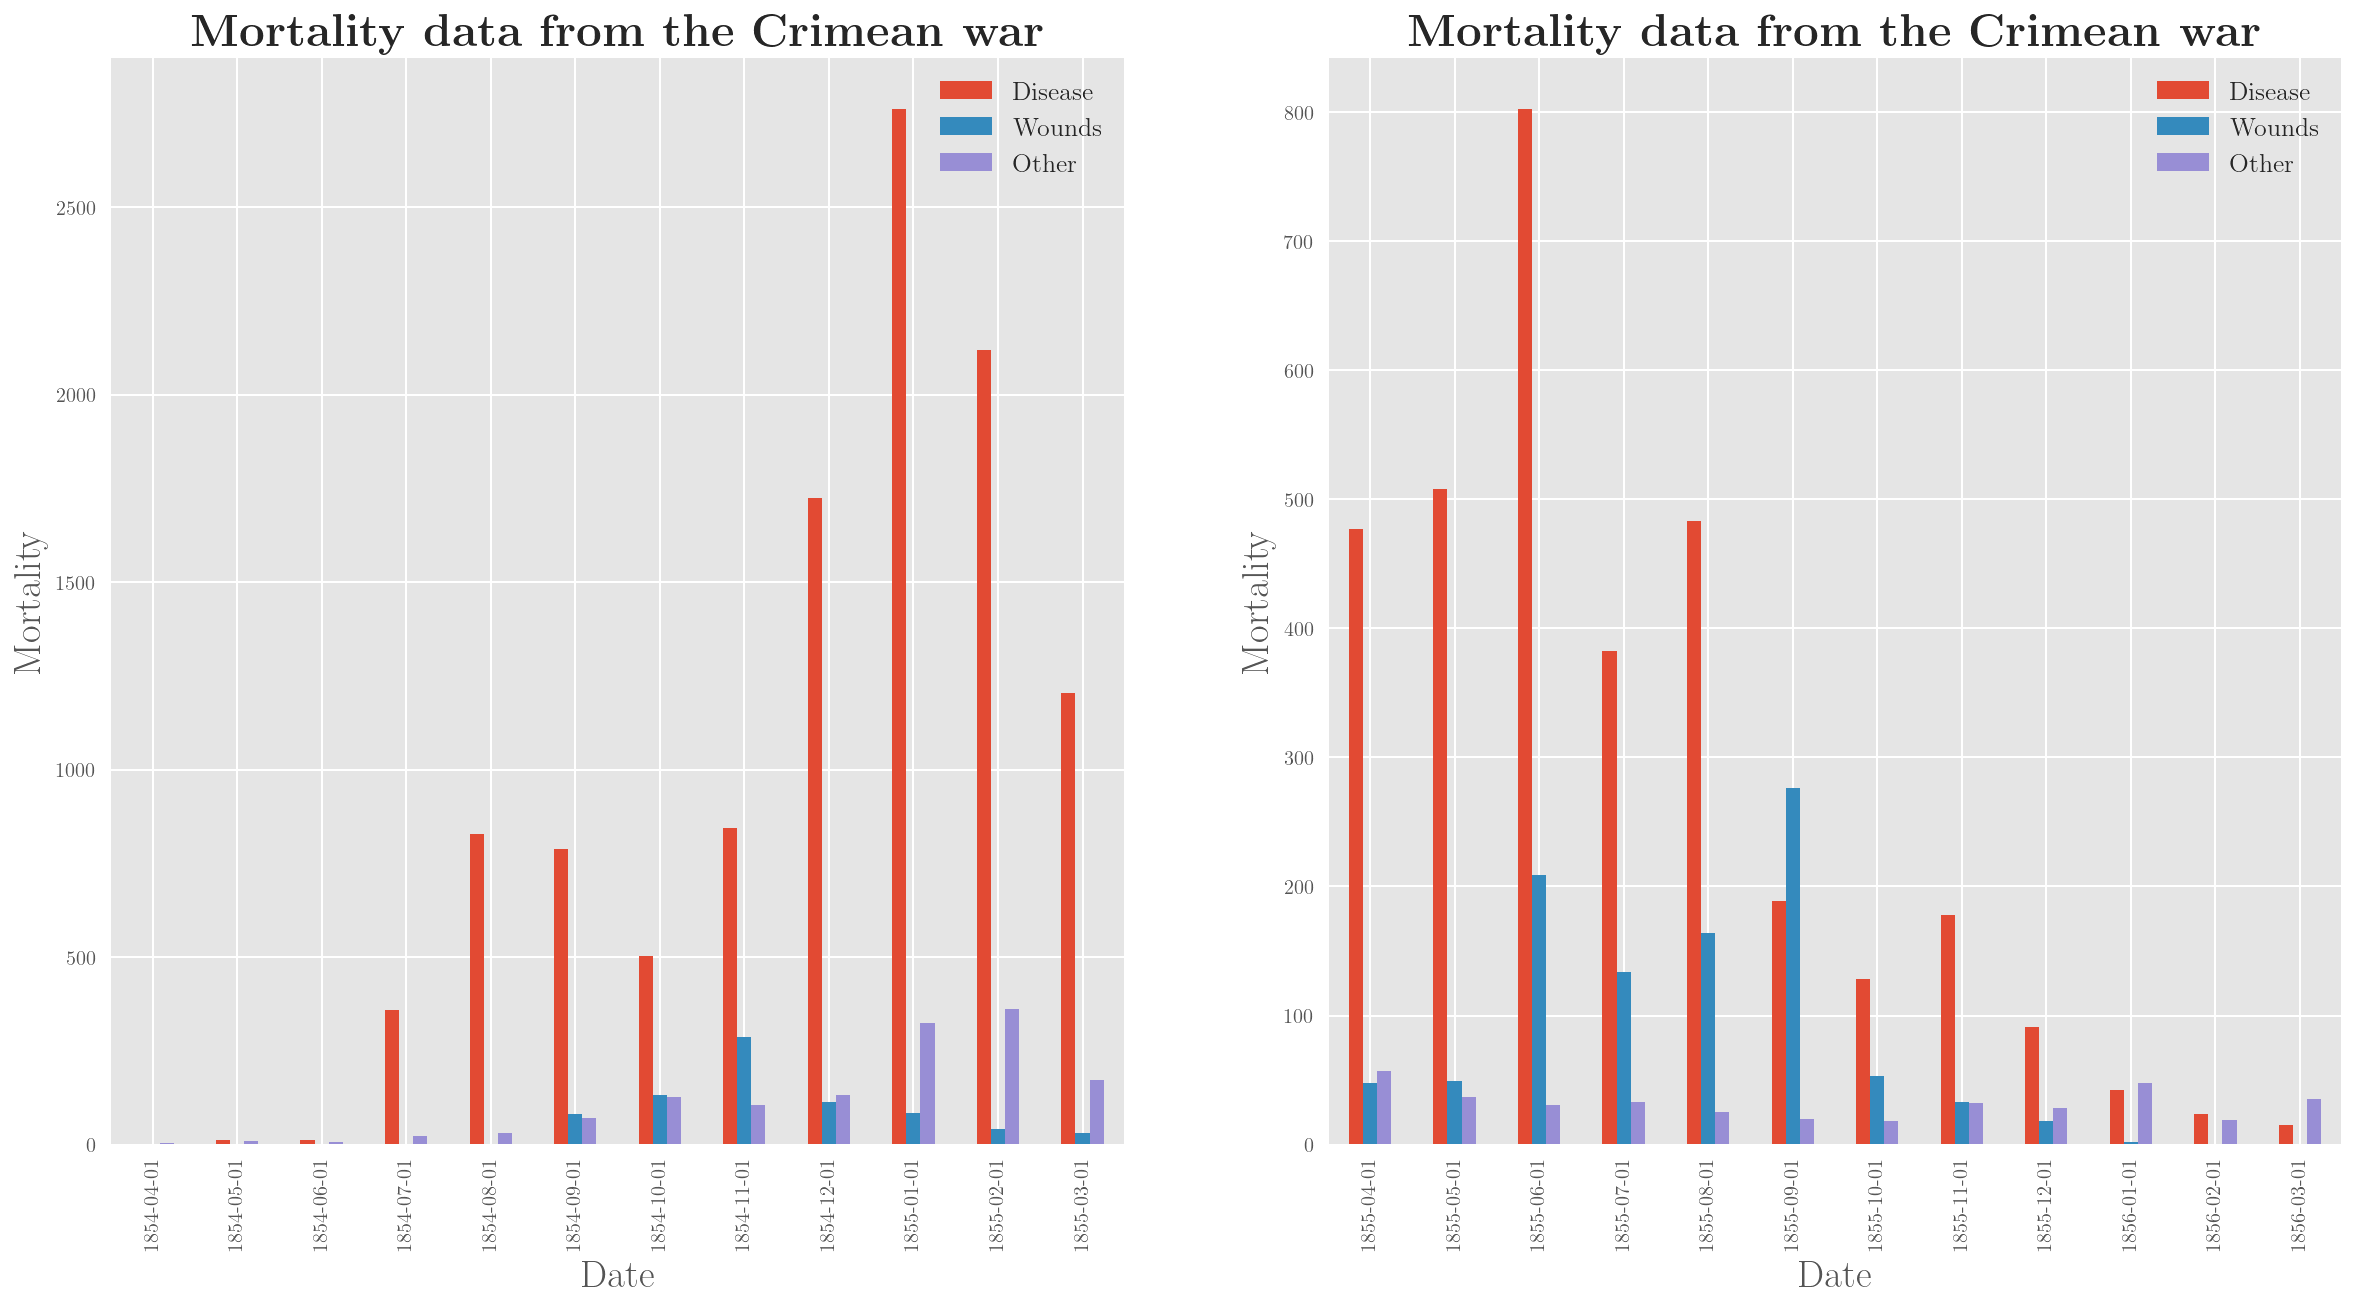

In [10]:
plt.figure(figsize=(20,10));

fig, (ax1, ax2) = plt.subplots(1,2);
one_year.plot.bar(x='Date', y=['Disease', 'Wounds', 'Other'], ax=ax1);
ax1.set_title(r'\textbf{Mortality data from the Crimean war}');
ax1.set_ylabel(r'Mortality');

second_year.plot.bar(x='Date', y=['Disease', 'Wounds', 'Other'], ax=ax2);
ax2.set_title(r'\textbf{Mortality data from the Crimean war}');
ax2.set_ylabel(r'Mortality');

Let us now convert the bar-chart above to polar coordinates.

findfont: Font family ['Blackadder ITC'] not found. Falling back to DejaVu Sans.


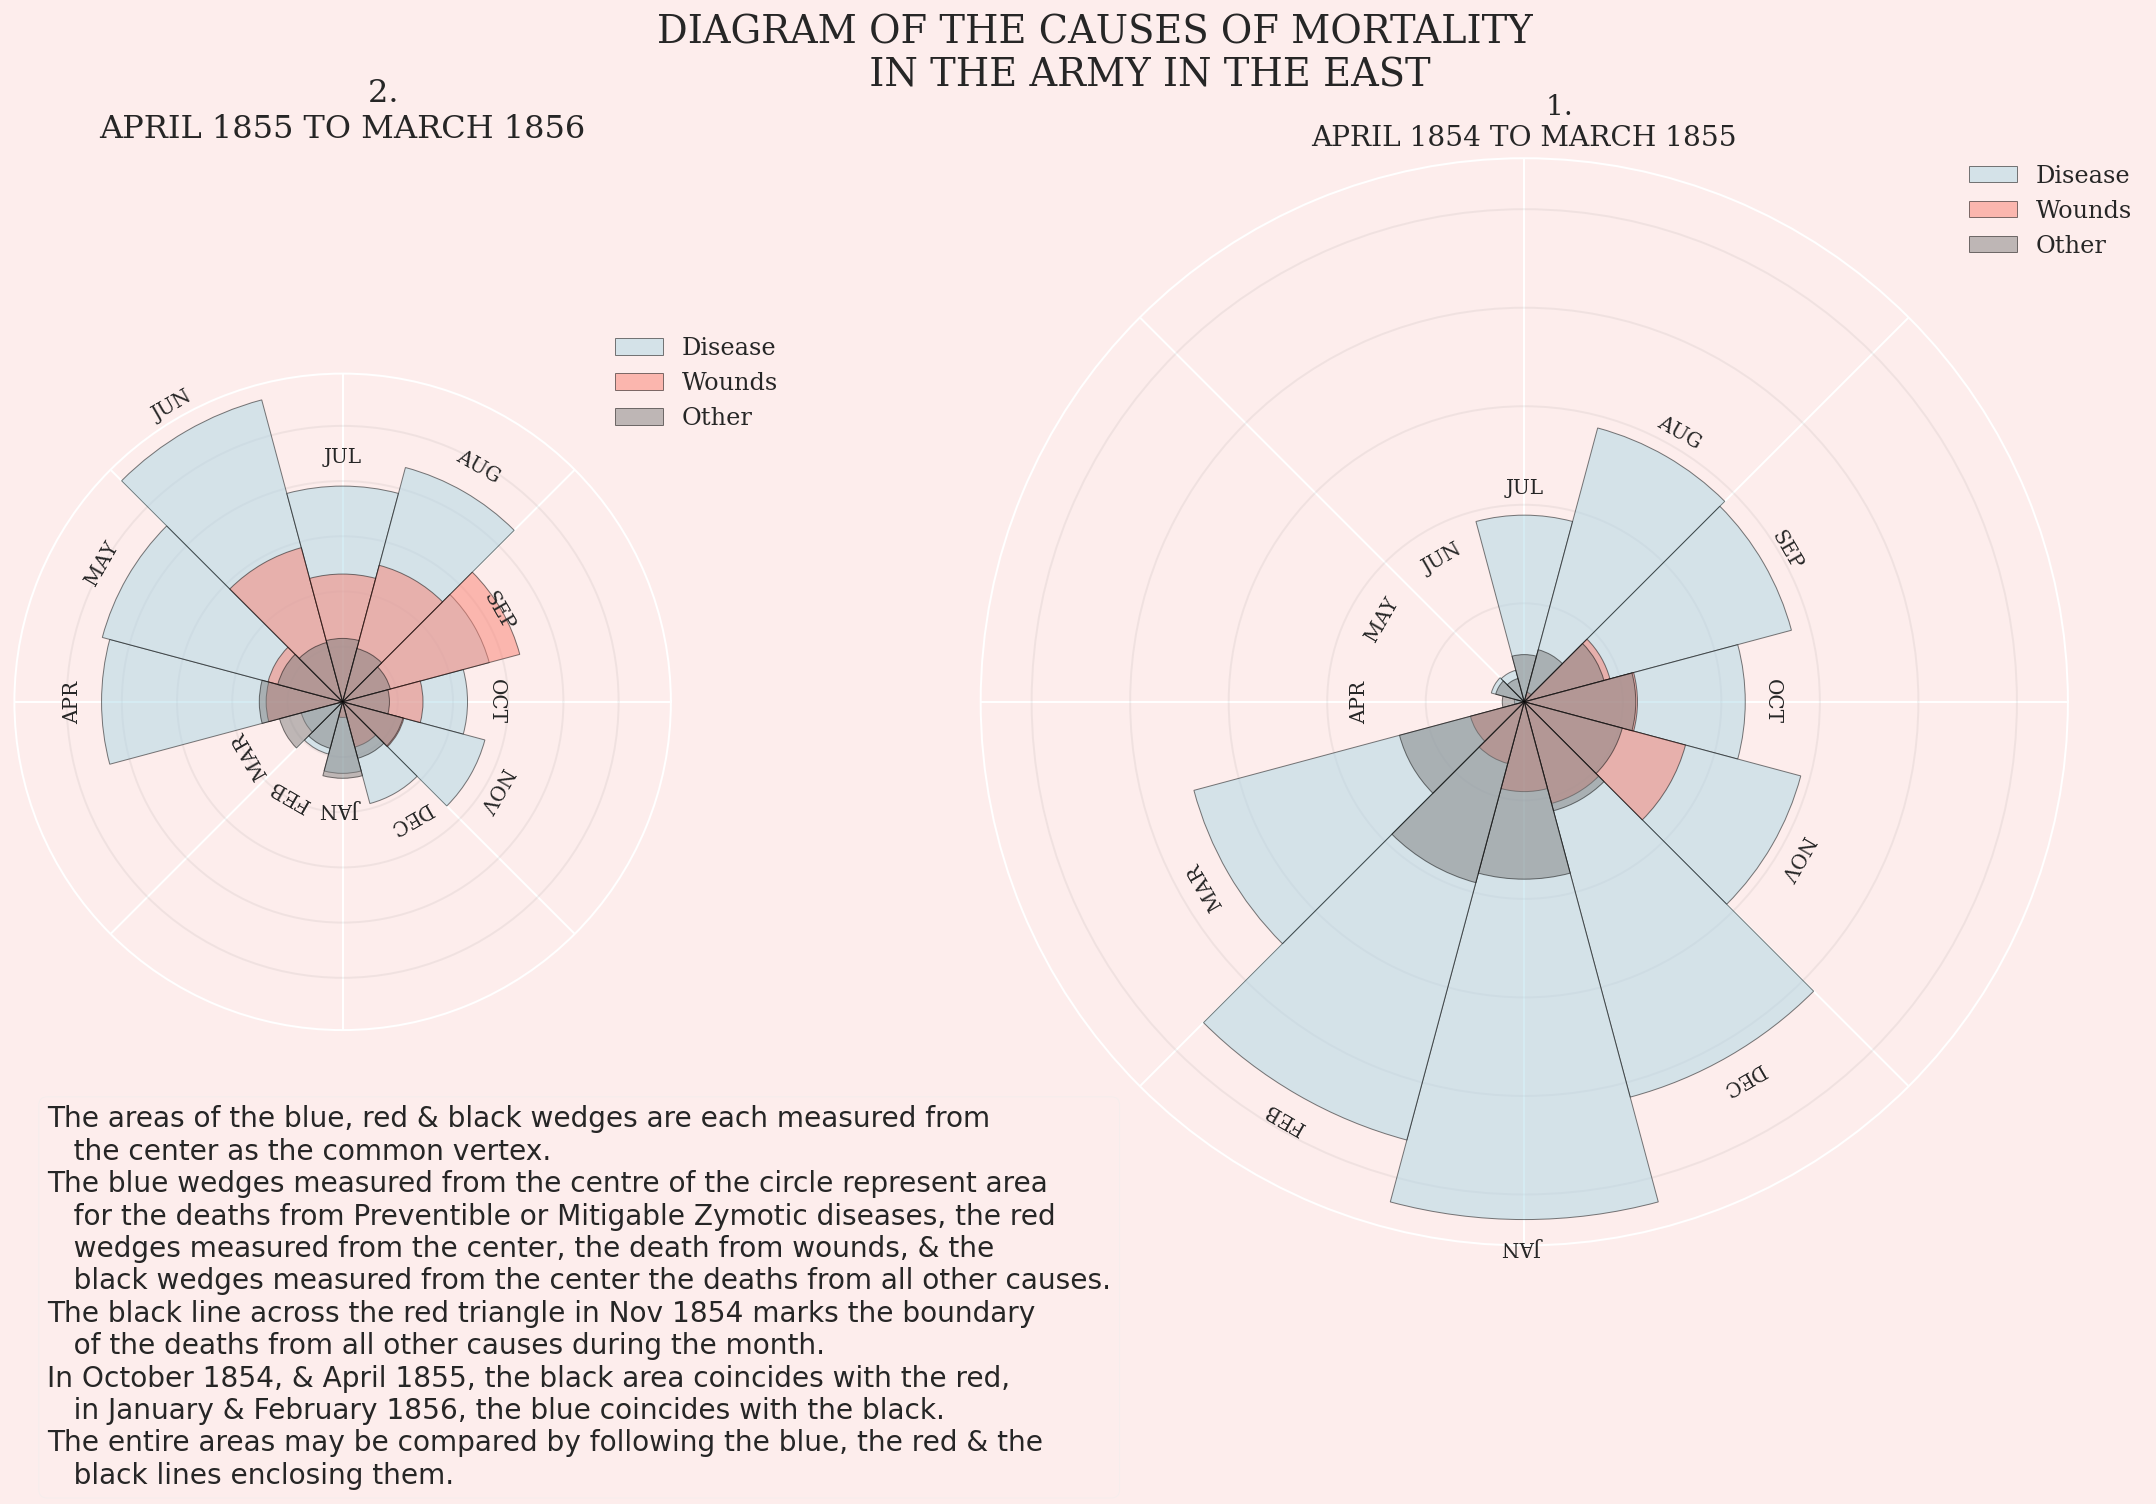

In [11]:
def plot_polar(ax, data, color):
    N=data.shape[0]                           # the number of arc-segments

    width=2*np.pi/N                           # width of each arc/bar
    x = np.linspace(np.pi , 
                    -np.pi , 
                    N, 
                    endpoint=False)           # the location of each bar
    
    # First, let us plot the soldiers dying from disease,
    # since this is the larger proportion.
    ax.bar(
        x,
       20*np.sqrt(data.Disease.values),
        width=width,
        color="lightblue",
        edgecolor="black",
        linewidth=0.5,
        alpha=0.5,
        label='Disease',
        
    );
   
    ax.patch.set_facecolor(color)              # set the background color to Florence's 
    ax.set_xticklabels([])                     # removing xticks
    ax.set_yticklabels([])                     # removing yticks
    ax.grid(color='grey', axis='y', alpha=0.1) # grid lines in very light grey

    #  Florence puts the month names over the radial-arcs. Let us
    #  try to imitate that.
    angles = np.linspace(90, -270, 
                         N, 
                         endpoint=False)
    arcs = ax.patches
    for arc, month, angle in zip (arcs, data.Month, angles):
        height = arc.get_height()
        t = ax.text(
            #arc.get_x() + arc.get_width() / 2, max(data.Disease.mean()+25, height + 25), month,
            arc.get_x() + arc.get_width() / 2, max(10*np.sqrt(data.Disease.mean())+10, height+35), month.upper(),
            ha="center",
            va="bottom",
            rotation=angle,
            rotation_mode="anchor", fontsize=10)
        
    # Finally, let us plot the soldiers dying from battle wounds
    # as an overlay.
    ax.bar(
        x,
        20*np.sqrt(data.Wounds.values),
        width=width,
        color="salmon",
        edgecolor="black",
        linewidth=0.5,
        alpha=0.5,
        label='Wounds'
        
    );
    ax.bar(
        x,
        20*np.sqrt(data.Other.values),
        width=width,
        color="grey",
        edgecolor="black",
        linewidth=0.5,
        alpha=0.5,
        label='Other'
        
    );
    
    
    # For clarity, let us add legends to the graph.
    prop={"size":12}                  # font size: 12
    ax.legend(loc=(0.9, 0.9),frameon=False, prop=prop)

#----------------------------------------------------------
rc ('text', usetex=False)
color='#FDEDEC'  # the closest match I could find to the color in the image.
size = (20,10)
fig = plt.figure(figsize=size)
fig.patch.set_facecolor(color)        # background color to the whole figure

# Since the left plot is about half the width of the right plot,
# we need to use the grid
ax1 = plt.subplot2grid(shape=(1,3), loc=(0,0), colspan=1, projection='polar')
ax2 = plt.subplot2grid(shape=(1,3), loc=(0,1), colspan=2, projection='polar')

# Plot the two roses
plot_polar(ax1, second_year, color)
plot_polar(ax2, one_year, color)

# Nightingale's text, abreviated, title and sub-titles
text =\
'''The areas of the blue, red & black wedges are each measured from
   the center as the common vertex. 
The blue wedges measured from the centre of the circle represent area
   for the deaths from Preventible or Mitigable Zymotic diseases, the red 
   wedges measured from the center, the death from wounds, & the 
   black wedges measured from the center the deaths from all other causes.
The black line across the red triangle in Nov 1854 marks the boundary
   of the deaths from all other causes during the month.
In October 1854, & April 1855, the black area coincides with the red,
   in January & February 1856, the blue coincides with the black.
The entire areas may be compared by following the blue, the red & the
   black lines enclosing them.'''


props = dict(boxstyle='round', facecolor=color, alpha=0.5)
font = {'fontname':'Blackadder ITC'}
titlefont={'fontname':'Old English Text MT'}
ax1.text(0.05,-0.7, text, transform=ax1.transAxes, fontsize=14,
        verticalalignment='bottom', bbox=props, fontname='Blackadder ITC') # fontname='Satisfy-Regular')

title =\
'''DIAGRAM OF THE CAUSES OF MORTALITY
         IN THE ARMY IN THE EAST'''
left =\
'''        2.
APRIL 1855 TO MARCH 1856
'''
right=\
'''        1.
APRIL 1854 TO MARCH 1855'''
ax1.set_title(left, pad=100, fontsize=16,)
ax2.set_title(right, fontsize=14)
plt.suptitle(title, );

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/17/Nightingale-mortality.jpg/1200px-Nightingale-mortality.jpg" />